# CosmicFishPie

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

snscolors = sns.color_palette("colorblind")
snscolors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [2]:
from cosmicfishpie.fishermatrix import cosmicfish
from cosmicfishpie.LSSsurvey import spectro_obs as spobs
from cosmicfishpie.analysis import fisher_plotting as fpp

# Table of Contents

[Options](#settings)

[Cosmology Parameters](#cosmology-parameters)

[Spectroscopic Power Spectrum](#spectroscopic-power-spectrum)

[Fisher Matrix of the GC spectroscopic probe](#fisher-matrix-gc-spectroscopic)

# Settings

In [3]:
# Base options for CosmicFishPie
options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "camb",
    "outroot": "Euclid_Demo-GCsp-Pess-class",
    "survey_name": "Euclid",
    "survey_name_spectro": "Euclid-Spectroscopic-ISTF-Superpessimistic",
    "survey_name_photo": False,
    "cosmo_model": "w0waCDM",
    "bfs8terms": False,
}

In [4]:
# Options to vary the parameters for the non-linear description of the observed power spectrum 
specs = {
    "nonlinear_model": "rescale_sigma_pv",
    "nonlinear_parametrization": {
        "rescale_sigmav": True,
        "rescale_sigmap": True,
        "rescale_sigma_pv": {
            "sigmap_1": 1.0,
            "sigmap_2": 1.0,
            "sigmap_3": 1.0,
            "sigmap_4": 1.0,
            "sigmav_1": 1.0,
            "sigmav_2": 1.0,
            "sigmav_3": 1.0,
            "sigmav_4": 1.0,
        }
    }
}

In [5]:
observables = ["GCsp"]

# Cosmology Parameters

In [6]:
fiducial = {
    "Omegam": 0.32,
    "Omegab": 0.05,
    "h": 0.67,
    "ns": 0.96,
    "sigma8": 0.815584,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}

### Pass options and settings to Cosmicfishpie

We set the survey to `Euclid-Spectroscopic-ISTF-Pessimistic` setting the default settings for the galaxy biases, modeling choices for red shift space distortions and computation of non-linearity

In [7]:
cosmoFM = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    specifications=specs,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************
Using default specifications for spectroscopic: /home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/configs/default_survey_specifications/Euclid-Spectroscopic-ISTF-Pessimistic.yaml

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Superpessimistic

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   5.77 s


In [8]:
cosmoFM.freeparams

{'Omegam': 0.01,
 'Omegab': 0.01,
 'w0': 0.01,
 'wa': 0.01,
 'h': 0.01,
 'ns': 0.01,
 'sigma8': 0.01,
 'lnbg_1': 0.0001,
 'lnbg_2': 0.0001,
 'lnbg_3': 0.0001,
 'lnbg_4': 0.0001,
 'Ps_1': 0.0001,
 'Ps_2': 0.0001,
 'Ps_3': 0.0001,
 'Ps_4': 0.0001,
 'sigmap_1': 0.01,
 'sigmap_2': 0.01,
 'sigmap_3': 0.01,
 'sigmap_4': 0.01,
 'sigmav_1': 0.01,
 'sigmav_2': 0.01,
 'sigmav_3': 0.01,
 'sigmav_4': 0.01}

# Spectroscopic Power Spectrum

The observed power spectrum of galaxies can be related to the mater power spectrum by 

$$
P^\mathrm{th} = q_\| \times  q_\perp^2 \times K \times \mathrm{FoG} \times \mathrm{Err} \times P_{mm} + P^\mathrm{shot}.
$$
The factors in front are due to different observational effects. The factor $q_\|$ and $q_\perp$ are coming from the fact that we can only observe the redshift of galaxies and not their position.
To calculate the power spectrum we have to settle for a reference transformation. If this is different from the cosmology we used to compute the power spectrum in, we find 
$$
q_\| = H(z)/H^\mathrm{ref}(z) \quad\text{and}\quad q_\perp = D_A^\mathrm{ref}(z)/D_A(z)
$$

The factors $K$ and ${\rm FoG}$ describe redshift space distortions and are given by
$$
K = \left(b+f\,\mu^2\right)^2\\
\mathrm{FoG} = 1+\left[f\,\sigma_p\,\mu^2\right]^2

$$
where $\mu$ denotes the cosine of the angle under which we observe the galaxies.
The factor ${\rm Err}$ is due to the spectroscopic resolution of the instrument and is given by
$$
\mathrm{Err} = \exp\left[-\sigma^2_\|\, k^2\, \mu^2 -\sigma_\perp^2 \,k^2\,\left(1- \mu^2\right)\right].
$$
Finaly, $P^\mathrm{shot}$ just is a constant term we add for shot noise.
The nonlinear power spectrum $P_{mm}$ is approximated as 
$$
P_{mm} \approx P_{dw} \coloneqq P_{mm}^\mathrm{lin}\,e^{-g} + P_{mm}\,(1-e^g),\\
g= \sigma_v^2 k^2\, \left((1-\mu^2)+\mu^2(1+f)^2\right)
$$

In [21]:
spectro_Pk = spobs.ComputeGalSpectro(cosmoFM.fiducialcosmopars)

In [22]:
print(spectro_Pk.spectrobiaspars)
print("bias term at z=1.0: ", spectro_Pk.bterm_fid(1.0, bias_sample="g"))
print("bias term at z=1.2: ", spectro_Pk.bterm_fid(1.2, bias_sample="g"))
print("bias term at z=1.4: ", spectro_Pk.bterm_fid(1.4, bias_sample="g"))
print("bias term at z=1.65: ", spectro_Pk.bterm_fid(1.65, bias_sample="g"))

{'lnbg_1': 0.37944989, 'lnbg_2': 0.4738057, 'lnbg_3': 0.55760176, 'lnbg_4': 0.64125687}
bias term at z=1.0:  1.4614803932771854
bias term at z=1.2:  1.606094892470849
bias term at z=1.4:  1.7464789980013922
bias term at z=1.65:  1.89886600781197


### "De-wiggling" of the Power Spectrum

To calculate the observed power spectrum we need to dewiggle it to find the non linear correction 

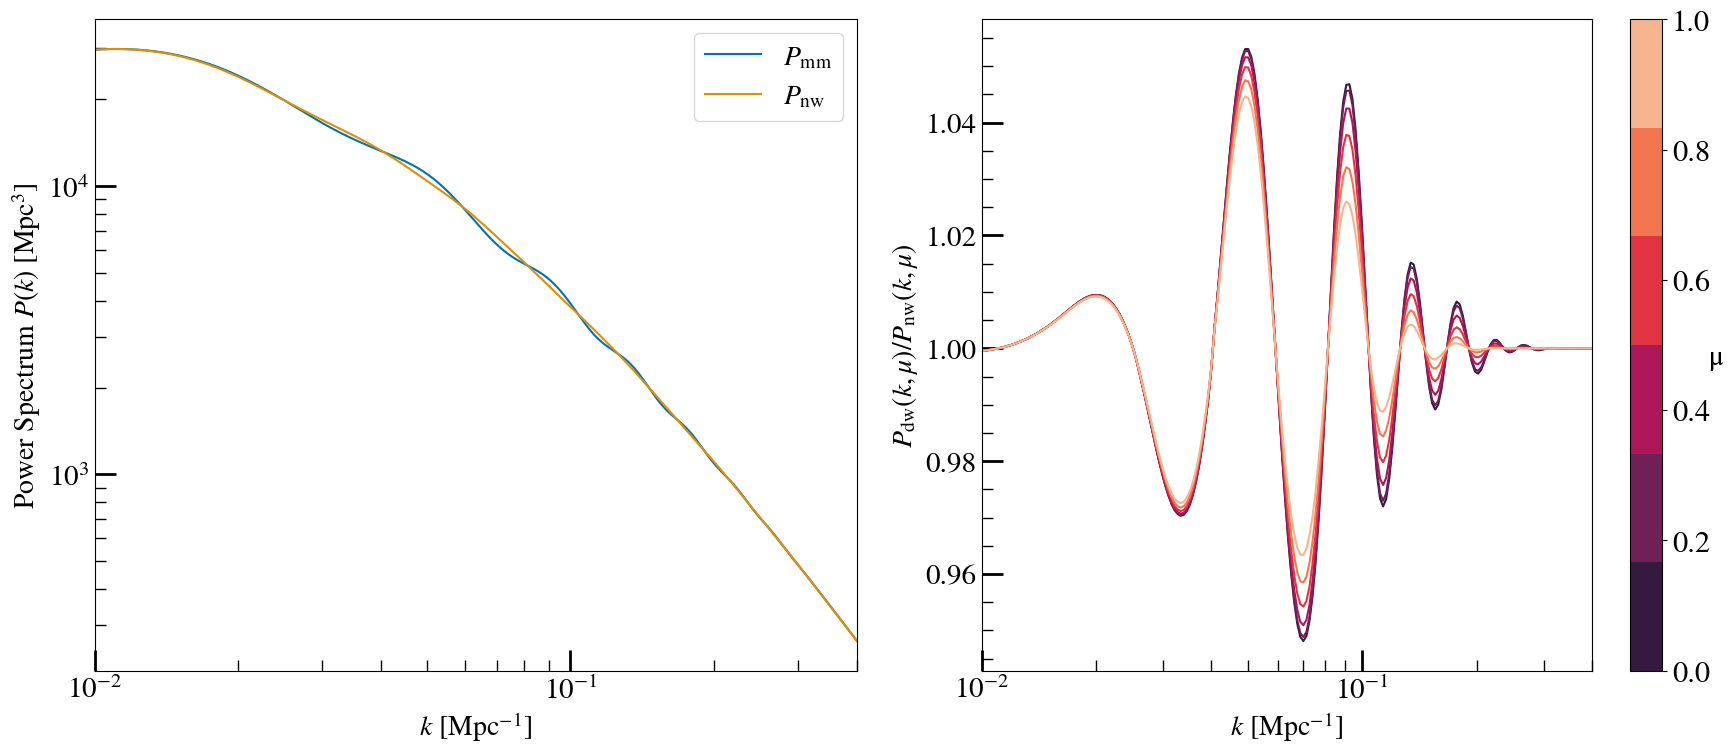

In [23]:

z = 1
kk = np.logspace(-2, np.log10(0.4), 200)

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

color = iter(snscolors)

c = next(color)
axs[0].loglog(kk, spectro_Pk.cosmo.Pmm(z, kk), c=c, label="$P_\mathrm{mm}$")
c = next(color)
axs[0].loglog(kk, spectro_Pk.cosmo.nonwiggle_pow(z, kk), c=c, label="$P_\mathrm{nw}$")
axs[0].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[0].set_ylabel(r"Power Spectrum $P(k)$ [$\mathrm{Mpc}^{3}$]", fontsize=20)
axs[0].legend(fontsize=20)
axs[0].set_xlim([1e-2, 0.4])

colormap_mu = sns.color_palette("rocket")
colors = iter(colormap_mu)
mus = np.linspace(0, 1, 6)

sm_mu = plt.cm.ScalarMappable(cmap=ListedColormap(colormap_mu), norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm_mu.set_array([])

for mu in mus:
    c = next(colors)
    axs[1].plot(kk, spectro_Pk.dewiggled_pdd(z, kk, mu) / spectro_Pk.normalized_pnw(z, kk), c=c)

cbar_mu = fig.colorbar(sm_mu, ax=axs[1])
cbar_mu.set_label('μ', fontsize=20, rotation=0)
axs[1].set_xscale("log")
axs[1].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[1].set_ylabel(r"$P_\mathrm{dw}(k, \mu)$/$P_\mathrm{nw}(k, \mu)$", fontsize=20)
axs[1].set_xlim([1e-2, 0.4])

[ax.tick_params(which="major", length=15, width=2, direction="in") for ax in axs]
[ax.tick_params(which="minor", length=8, width=1, direction="in") for ax in axs]
[ax.minorticks_on() for ax in axs]
[ax.tick_params(axis="both", which="major", labelsize=21) for ax in axs]
[ax.tick_params(axis="both", which="minor", labelsize=15) for ax in axs]

plt.show()

#### Compute the observed power spectrum at different redshifts and different angles 

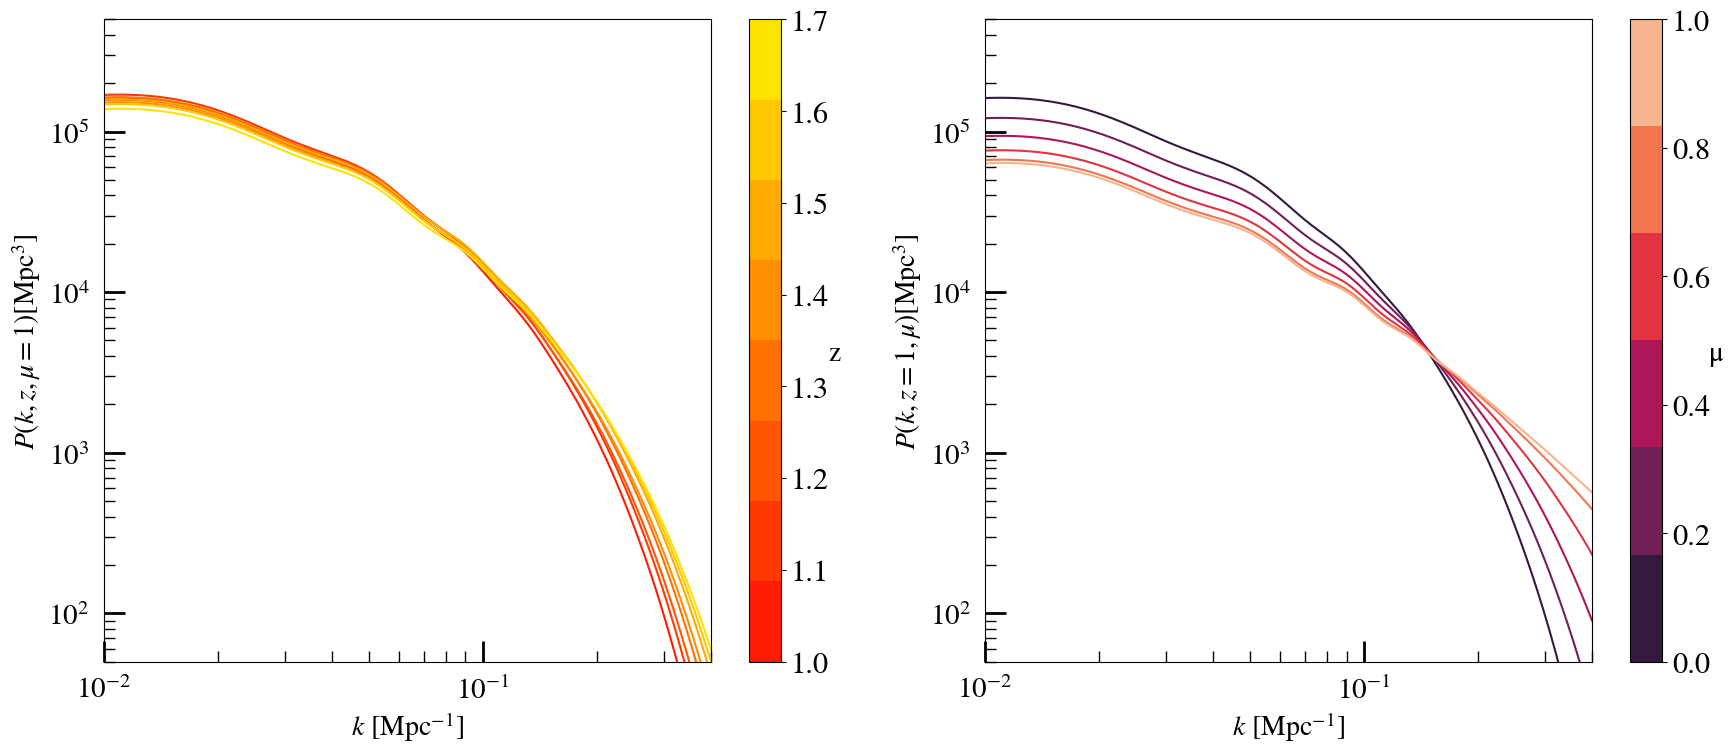

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

colormap_z = sns.color_palette("autumn", 8)
colors_z = iter(colormap_z)
zz = np.linspace(1, 1.7, 8)

sm_z = plt.cm.ScalarMappable(cmap=ListedColormap(colormap_z), norm=plt.Normalize(vmin=zz.min(), vmax=zz.max()))
sm_z.set_array([])

zz = np.linspace(1, 1.7, 8)
for z in zz:
    c = next(colors_z)
    axs[0].loglog(kk, spectro_Pk.observed_Pgg(z, kk, 1), c=c)

axs[0].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[0].set_ylabel(r"$P(k,z,\mu=1)[\mathrm{Mpc}^3]$", fontsize=20)
axs[0].set_xlim([1e-2, 0.4])
axs[0].set_ylim([5*1e1, 5*1e5])
cbar_z = fig.colorbar(sm_z, ax=axs[0])
cbar_z.set_label('z', fontsize=20, rotation=0)

colormap_mu = sns.color_palette("rocket", 6)
colors_mu = iter(colormap_mu)
mus = np.linspace(1, 0, 6)
sm_mu = plt.cm.ScalarMappable(cmap=ListedColormap(colormap_mu), norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm_mu.set_array([])

for mu in mus:
    c = next(colors_mu)
    axs[1].loglog(kk, spectro_Pk.observed_Pgg(1, kk, mu), c=c)

axs[1].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[1].set_ylabel(r"$P(k,z=1,\mu)[\mathrm{Mpc}^3]$", fontsize=20)
axs[1].set_xlim([1e-2, 0.4])
axs[1].set_ylim([5*1e1, 5*1e5])
cbar_mu = fig.colorbar(sm_mu, ax=axs[1])
cbar_mu.set_label('μ', fontsize=20, rotation=0)

[ax.tick_params(which="major", length=15, width=2, direction="in") for ax in axs]
[ax.tick_params(which="minor", length=8, width=1, direction="in") for ax in axs]
[ax.minorticks_on() for ax in axs]
[ax.tick_params(axis="both", which="major", labelsize=21, pad=10) for ax in axs]
[ax.tick_params(axis="both", which="minor", labelsize=15) for ax in axs]
plt.tight_layout()
plt.show()

### Compare the Power Spectrum from two different cosmologies

In [13]:
sample = {
    "Omegam": 0.32,
    "Omegab": 0.06,  # 20% higher than the fiducial
    "h": 0.737,  # 10% higher than the fiducal
    "ns": 0.96,
    "sigma8": 0.815584,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}

spectro_Pk_sampled = spobs.ComputeGalSpectro(sample, cosmoFM.fiducialcosmopars)

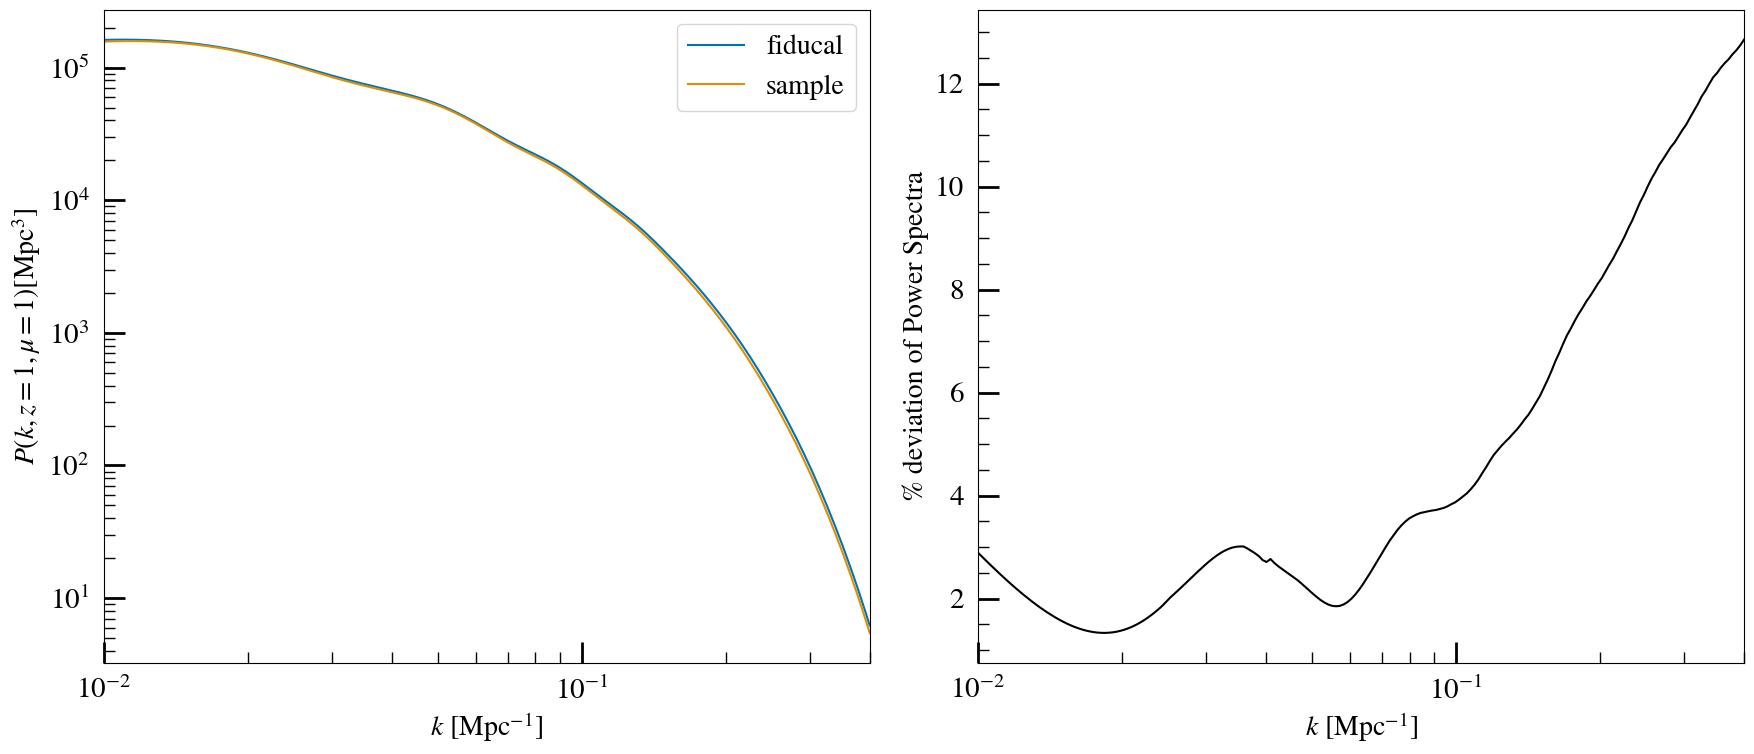

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

colormap = sns.color_palette("colorblind")
colors = iter(colormap)

c = next(colors)
axs[0].loglog(kk, spectro_Pk.observed_Pgg(1, kk, 1), c=c, label="fiducal")

c = next(colors)
axs[0].loglog(kk, spectro_Pk_sampled.observed_Pgg(1, kk, 1), c=c, label="sample")

axs[0].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[0].set_ylabel(r"$P(k,z=1,\mu=1)[\mathrm{Mpc}^3]$", fontsize=20)
axs[0].set_xlim([1e-2, 0.4])
axs[0].legend(fontsize=20)
axs[0].set_xscale("log")

axs[1].plot(
    kk,
    (spectro_Pk.observed_Pgg(1, kk, 1) - spectro_Pk_sampled.observed_Pgg(1, kk, 1))
    / (spectro_Pk.observed_Pgg(1, kk, 1) + spectro_Pk_sampled.observed_Pgg(1, kk, 1))
    * 200,
    c="black",
)

axs[1].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[1].set_ylabel(r"% deviation of Power Spectra", fontsize=20)
axs[1].set_xlim([1e-2, 0.4])
axs[1].set_xscale("log")

[ax.tick_params(which="major", length=15, width=2, direction="in") for ax in axs]
[ax.tick_params(which="minor", length=8, width=1, direction="in") for ax in axs]
[ax.minorticks_on() for ax in axs]
[ax.tick_params(axis="both", which="major", labelsize=21, pad=10) for ax in axs]
[ax.tick_params(axis="both", which="minor", labelsize=15) for ax in axs]

plt.show()

# Fisher Matrix GC spectroscopic

After we have learned how to extract the observable for the spectroscopic we will perform a Fisher forecast

In [15]:
freepars = [key for key in cosmoFM.freeparams.keys()]
freepars

['Omegam',
 'Omegab',
 'w0',
 'wa',
 'h',
 'ns',
 'sigma8',
 'lnbg_1',
 'lnbg_2',
 'lnbg_3',
 'lnbg_4',
 'Ps_1',
 'Ps_2',
 'Ps_3',
 'Ps_4',
 'sigmap_1',
 'sigmap_2',
 'sigmap_3',
 'sigmap_4',
 'sigmav_1',
 'sigmav_2',
 'sigmav_3',
 'sigmav_4']

In [16]:
fisher = cosmoFM.compute()


In class: FisherMatrix  ----> Computing Pk-spectro Fisher matrix
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: derivatives  Derivative on Omegam done! in :  12.03 s

  +++ Computing derivative on Omegab

In class: derivatives  Derivative on Omegab done! in :  13.02 s

  +++ Computing derivative on w0

In class: derivatives  Derivative on w0 done! in :  18.42 s

  +++ Computing derivative on wa

In class: derivatives  Derivative on wa done! in :  19.17 s

  +++ Computing derivative on h

In class: derivatives  Derivative on h done! in :  15.60 s

  +++ Computing derivative on ns

In class: derivatives  Derivative on ns done! in :  16.48 s

  +++ Computing derivative on sigma8

In class: derivatives  Derivative on sigma8 done! in :  16.53 s

  +++ Computing derivative on lnbg_1

In class: derivatives  Derivative on lnbg_1 done! in :  0.25 s

  +++ Computing derivative on lnbg_2

In class: derivatives  Derivativ

The Fisher matrix was computed varying the non-linear parameters. This effect of this modeling choice can be studied by comparaing it to the Fisher with the parameters fixed. 

In [17]:
from cosmicfishpie.analysis.fisher_operations import eliminate_parameters
from cosmicfishpie.analysis.fisher_plotting import fisher_plotting

In [18]:
fisher_fixed = eliminate_parameters(
    fisher,
    [
        "sigmap_1", "sigmav_1",
        "sigmap_2", "sigmav_2",
        "sigmap_3", "sigmav_3",
        "sigmap_4", "sigmav_4",
    ]
)

fisherlist = [fisher, fisher_fixed]
plotpars = ["Omegam", "Omegab", "h", "w0"]

In [19]:
plot_options = {'fishers_list': fisherlist, 
                'colors': [snscolors[i] for i in range(len(fisherlist))],
                'fish_labels': ['Euclid GCsp', "Euclid GCsp Fixed NL"],
                'plot_pars': plotpars,
                'axis_custom_factors': {'all': 3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-comparison_w0waCDM_GCsp'  ## file name root for all the plots, extra names can be added individually
                } 

./plots  exists already
Fisher matrix loaded, label name:  Euclid GCsp
Fisher matrix loaded, label name:  Euclid GCsp Fixed NL
Entering plotting routine
{'Omegam': [np.float64(0.2596010283185703), np.float64(0.3803989716814297)], 'Omegab': [np.float64(0.03267935438946255), np.float64(0.06732064561053745)], 'w0': [np.float64(-1.5556395856539216), np.float64(-0.4443604143460784)], 'wa': [np.float64(-0.9942025917622592), np.float64(0.9942025917622592)], 'h': [np.float64(0.4636169757627296), np.float64(0.8763830242372705)], 'ns': [np.float64(0.8473486227315115), np.float64(1.0726513772684885)], 'sigma8': [np.float64(0.7771325887231229), np.float64(0.8540354112768771)], 'lnbg_1': [np.float64(0.3481752963153778), np.float64(0.4107247036846222)], 'lnbg_2': [np.float64(0.44026729449283264), np.float64(0.5073447055071674)], 'lnbg_3': [np.float64(0.5221606079350936), np.float64(0.5930433920649065)], 'lnbg_4': [np.float64(0.6039032644622241), np.float64(0.6786107355377758)], 'Ps_1': [np.float64(-

/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/miniforge3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/miniforge3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


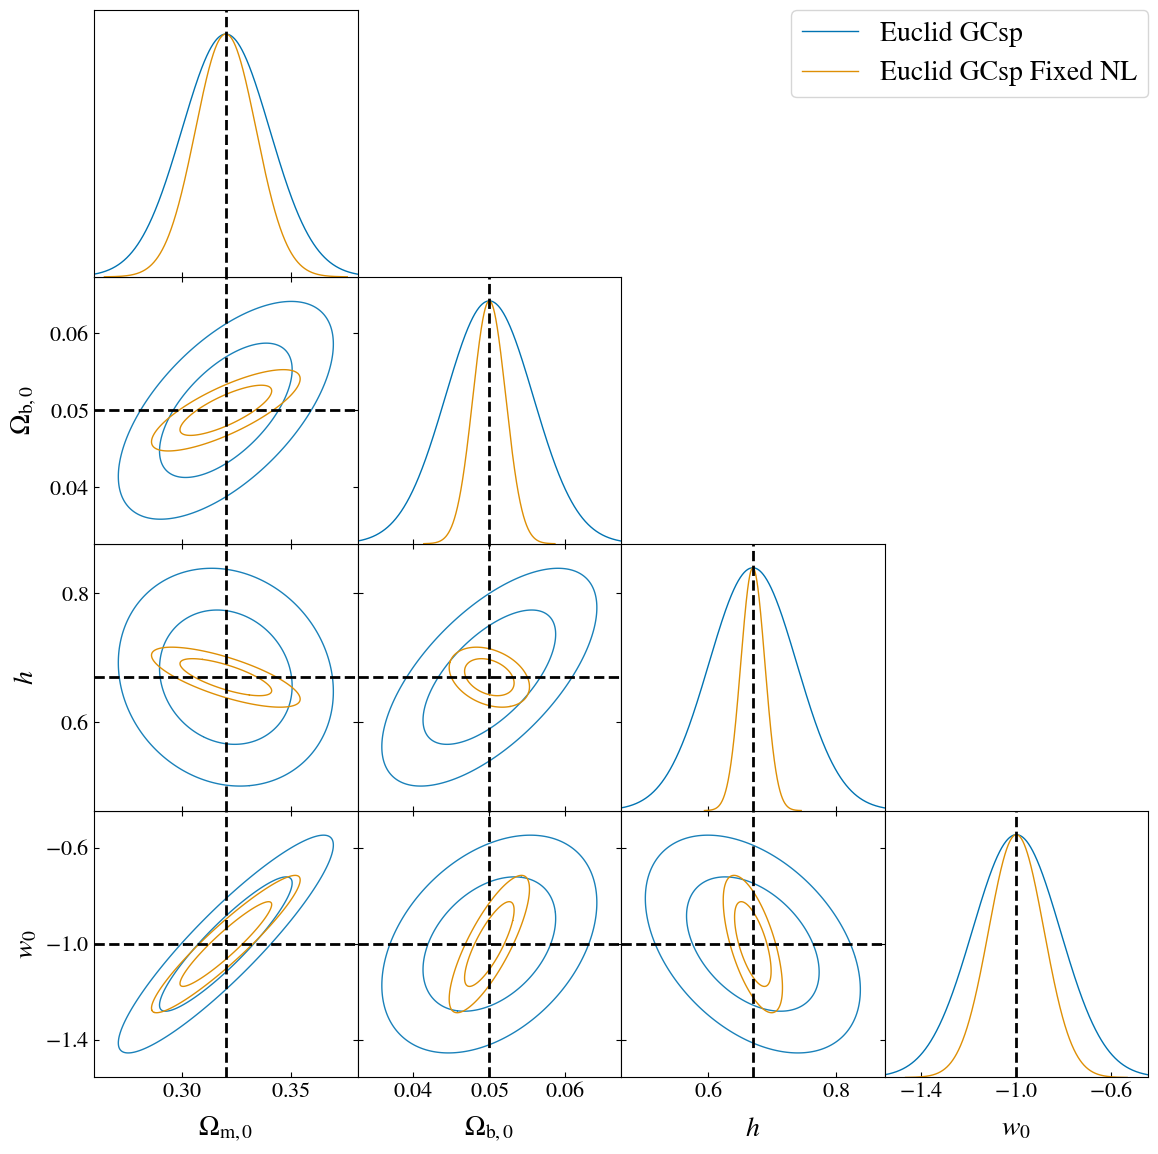

In [20]:
fish_plotter = fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=False)